In [19]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Activation,Dropout,Dense,Conv2D,AveragePooling2D,Flatten,ZeroPadding2D,MaxPooling2D
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import seaborn as sns
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
import math
import cv2
import imageio
from os import listdir
import warnings
import filecmp
from PIL import Image

In [3]:
def rotate(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [5]:
cover_img=[]
stego_img=[]
IMG_SHAPE = 50
stegana_images=[]
stegana_labels=[]
#listdir("../input/train/Train")
base_path = "/content/drive/MyDrive/dataset Cover/"
cover_=base_path+'cover/'
for file in listdir(cover_):
    file_path = cover_ + file
    if file.endswith('.jpg'):
            image = imageio.imread(file_path)
            #print(image)
            if len(image.shape) > 2 and image.shape[2] == 4:
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
            image=cv2.resize(image,(50,50))
            image=image/255
            rotated45 = rotate(image,45)
            rotated75 =rotate(image,75)
            rotated120=rotate(image,120)
           # print(image.shape)
            cover_img.append(image)
            cover_img.append(rotated45)
            cover_img.append(rotated75)
            cover_img.append(rotated120)
            stegana_images.append(image)
            stegana_images.append(rotated45)
            stegana_images.append(rotated75)
            stegana_images.append(rotated120)
            stegana_labels.append(0)
            stegana_labels.append(0)
            stegana_labels.append(0)
            stegana_labels.append(0)
stego_ =r"/content/drive/MyDrive/Dataset Stego/stego/"
for file in listdir(stego_):
    if file.endswith('.jpg'):
        file_path = stego_ + file
        image = imageio.imread(file_path)
        if len(image.shape) > 2 and image.shape[2] == 4:
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
        image=cv2.resize(image,(50,50))
        image=image/255
       # print(image.shape)
        rotated45 = rotate(image,45)
        rotated75 =rotate(image,75)
        rotated120=rotate(image,120)
        # print(image.shape)
        stego_img.append(image)
        stego_img.append(rotated45)
        stego_img.append(rotated75)
        stego_img.append(rotated120)
        stegana_images.append(image)
        stegana_images.append(rotated45)
        stegana_images.append(rotated75)
        stegana_images.append(rotated120)
        stegana_labels.append(1)
        stegana_labels.append(1)
        stegana_labels.append(1)
        stegana_labels.append(1)


<ipython-input-5-6ba6da9390da>:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(file_path)
<ipython-input-5-6ba6da9390da>:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(file_path)


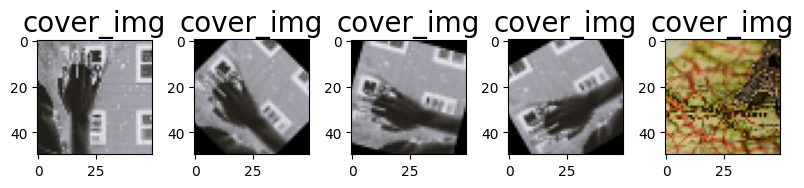

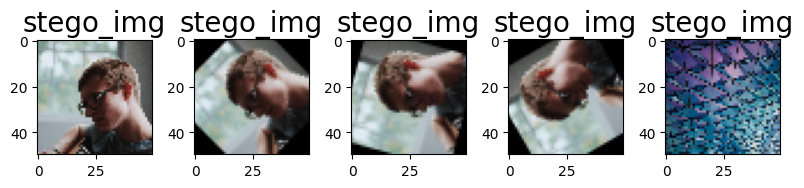

In [6]:
def ShowFirstFive(images_arr,title):

    fig, axes = plt.subplots(1, 5, figsize=(8,8))

    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.set_title(title,fontsize=20)
    plt.tight_layout()
    plt.show()
ShowFirstFive(cover_img,'cover_img')
ShowFirstFive(stego_img,'stego_img')



In [7]:
def reorder(old_list,order):
    new_list = []
    for i in order:
        new_list.append(old_list[i])
    return new_list

np.random.seed(seed=42)
indices = np.arange(len(stegana_labels))
np.random.shuffle(indices)
indices = indices.tolist()
fruit_labels = reorder(stegana_labels,indices)
fruit_images = reorder(stegana_images,indices)
image_array = np.array(stegana_images)
label_array = np.array(stegana_labels)
print(image_array.shape)
print(label_array.shape)

(6984, 50, 50, 3)
(6984,)


In [8]:

from keras.utils.np_utils import to_categorical
label_array=to_categorical(label_array,2)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(image_array,label_array, test_size=0.3)
# X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.3)
print("train number",X_train.shape)
print("test number",X_test.shape)
print("training label",y_train.shape)
print("test label",y_test.shape)

train number (4888, 50, 50, 3)
test number (2096, 50, 50, 3)
training label (4888, 2)
test label (2096, 2)


In [10]:
import keras
model =  Sequential()
#convolutional layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(50,50,3),padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))


opt = optimizers.Adam(lr=0.001)
# initiate RMSprop optimizer
#opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size= 10, epochs=20,
                            validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
489/489 [==============================] - 45s 85ms/step - loss: 0.6838 - accuracy: 0.5843 - val_loss: 0.6788 - val_accuracy: 0.5859
Epoch 2/20
489/489 [==============================] - 39s 79ms/step - loss: 0.6797 - accuracy: 0.5876 - val_loss: 0.6797 - val_accuracy: 0.5859
Epoch 3/20
489/489 [==============================] - 39s 80ms/step - loss: 0.6785 - accuracy: 0.5876 - val_loss: 0.6785 - val_accuracy: 0.5859
Epoch 4/20
489/489 [==============================] - 38s 78ms/step - loss: 0.6783 - accuracy: 0.5876 - val_loss: 0.6786 - val_accuracy: 0.5859
Epoch 5/20
489/489 [==============================] - 39s 79ms/step - loss: 0.6784 - accuracy: 0.5876 - val_loss: 0.6784 - val_accuracy: 0.5859
Epoch 6/20
489/489 [==============================] - 39s 80ms/step - loss: 0.6780 - accuracy: 0.5876 - val_loss: 0.6785 - val_accuracy: 0.5859
Epoch 7/20
489/489 [==============================] - 36s 74ms/step - loss: 0.6781 - accuracy: 0.5876 - val_loss: 0.6790 - val_accuracy:

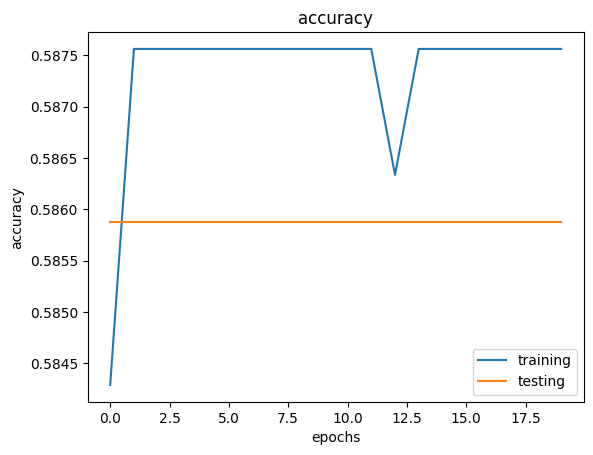

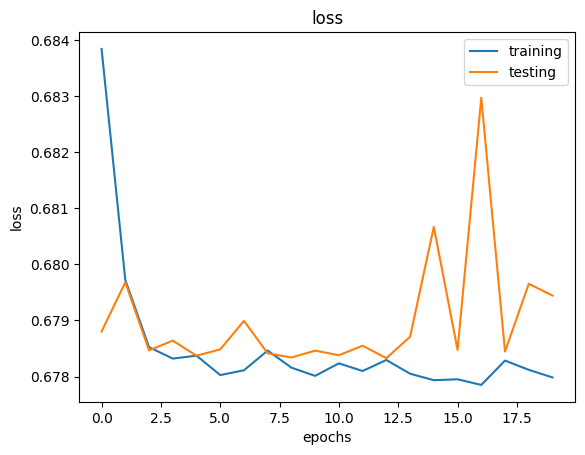

In [11]:
def visualize_training(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'testing'], loc='lower right')
    plt.show()

    # A chart showing our training vs validation loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'testing'], loc='upper right')
    plt.show()
visualize_training(history)

In [12]:
y_pred_baseline = model.predict(X_test)
y_pred = []
for i in range(2096):
    y_pred.append(y_pred_baseline[i].argmax())



66/66 [==============================] - 4s 51ms/step


In [13]:
y_pred = model.predict(X_test)
y_pred = y_pred.round()

66/66 [==============================] - 5s 68ms/step


In [14]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1228
           1       0.00      0.00      0.00       868

   micro avg       0.59      0.59      0.59      2096
   macro avg       0.29      0.50      0.37      2096
weighted avg       0.34      0.59      0.43      2096
 samples avg       0.59      0.59      0.59      2096



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 58.7222222222222, 'Ground Truth')

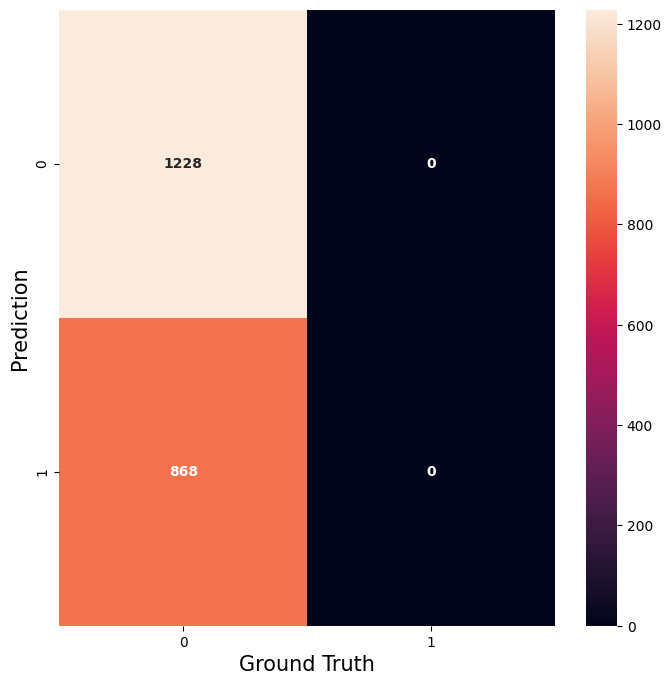

In [15]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)), annot=True, fmt='d', annot_kws={"size": 10, "weight": "bold"})
ax.set_ylabel('Prediction', fontsize=15);
ax.set_xlabel('Ground Truth', fontsize=15)

In [16]:

print("Testing metrics of CNN:")
print("==================")
tn,fp,fn,tp = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).ravel()
print('True Negative: ',tn)
print('False Positive: ',fp)
print('False Negative: ',fn)
print('True Positive: ',tp)
acc = (tp+tn)/(tp+tn+fp+fn)
PR = (tp)/(tp+fp)
FAR = (fp)/(tn+fp)
recall = (tp)/(tp+fn)
f1 = 2*((recall*PR)/(recall+PR))
print("Accuracy:", acc)
print("Precision:",PR)
print("False Alarm Rate:", FAR)
print("Recall:", recall)
print("f1:", f1)

Testing metrics of CNN:
True Negative:  1228
False Positive:  0
False Negative:  868
True Positive:  0
Accuracy: 0.5858778625954199
Precision: nan
False Alarm Rate: 0.0
Recall: 0.0
f1: nan


<ipython-input-16-e9fcfb38466b>:9: RuntimeWarning: invalid value encountered in long_scalars
  PR = (tp)/(tp+fp)


In [17]:


from keras.models import Model
from keras.layers import Input, Dense, Flatten, LSTM
from keras.layers.convolutional import Conv1D
from keras.layers import concatenate
# define input shape
input_shape = (50,50,3)

# channel 1
inputs1 = Input(shape=input_shape)
conv1 = Conv2D(filters=64, kernel_size=3, activation='relu')(inputs1)
pool1 = MaxPooling2D(2,2)(conv1)
flat1 = Flatten()(pool1)

# channel 2
inputs2 = Input(shape=input_shape)
conv2 = Conv2D(filters=64, kernel_size=5, activation='relu')(inputs2)
pool2 = MaxPooling2D(2,2)(conv2)
flat2 = Flatten()(pool2)

# channel 3
inputs3 = Input(shape=input_shape)
conv3 = Conv2D(filters=64, kernel_size=7, activation='relu')(inputs3)
pool3 = MaxPooling2D(2,2)(conv3)
flat3 = Flatten()(pool3)

# merge
merged = concatenate([flat1, flat2, flat3])

# interpretation
dense1 = Dense(100, activation='relu')(merged)
outputs = Dense(2, activation='softmax')(dense1)
model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)

# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
import numpy as np

# fit model
history = model.fit([X_train, X_train, X_train], y_train, epochs= 10, batch_size=10, validation_data=([X_test, X_test, X_test], y_test))

Epoch 1/10
489/489 [==============================] - 148s 300ms/step - loss: 0.7262 - accuracy: 0.5806 - val_loss: 0.6827 - val_accuracy: 0.5859
Epoch 2/10
489/489 [==============================] - 147s 300ms/step - loss: 0.6793 - accuracy: 0.5876 - val_loss: 0.6842 - val_accuracy: 0.5859
Epoch 3/10
489/489 [==============================] - 148s 304ms/step - loss: 0.6794 - accuracy: 0.5863 - val_loss: 0.6862 - val_accuracy: 0.5859
Epoch 4/10
489/489 [==============================] - 150s 308ms/step - loss: 0.6816 - accuracy: 0.5878 - val_loss: 0.6791 - val_accuracy: 0.5859
Epoch 5/10
489/489 [==============================] - 145s 296ms/step - loss: 0.6795 - accuracy: 0.5867 - val_loss: 0.6804 - val_accuracy: 0.5849
Epoch 6/10
489/489 [==============================] - 145s 297ms/step - loss: 0.6794 - accuracy: 0.5882 - val_loss: 0.6820 - val_accuracy: 0.5844
Epoch 7/10
489/489 [==============================] - 144s 294ms/step - loss: 0.6770 - accuracy: 0.5869 - val_loss: 0.6861 -

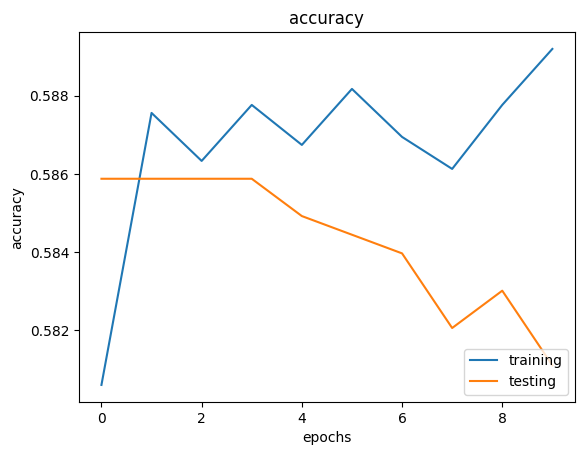

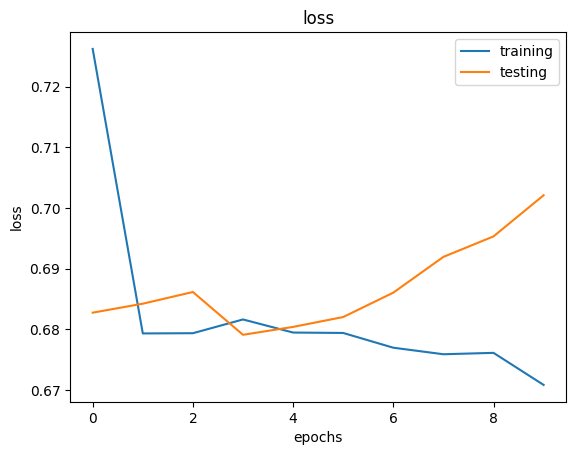

In [20]:
def visualize_training(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'testing'], loc='lower right')
    plt.show()

    # A chart showing our training vs validation loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'testing'], loc='upper right')
    plt.show()
visualize_training(history)

In [21]:
y_pred = model.predict([X_test,X_test,X_test])
y_pred = y_pred.round()

66/66 [==============================] - 7s 102ms/step


In [22]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.99      0.74      1228
           1       0.00      0.00      0.00       868

   micro avg       0.58      0.58      0.58      2096
   macro avg       0.29      0.50      0.37      2096
weighted avg       0.34      0.58      0.43      2096
 samples avg       0.58      0.58      0.58      2096



Text(0.5, 58.7222222222222, 'Ground Truth')

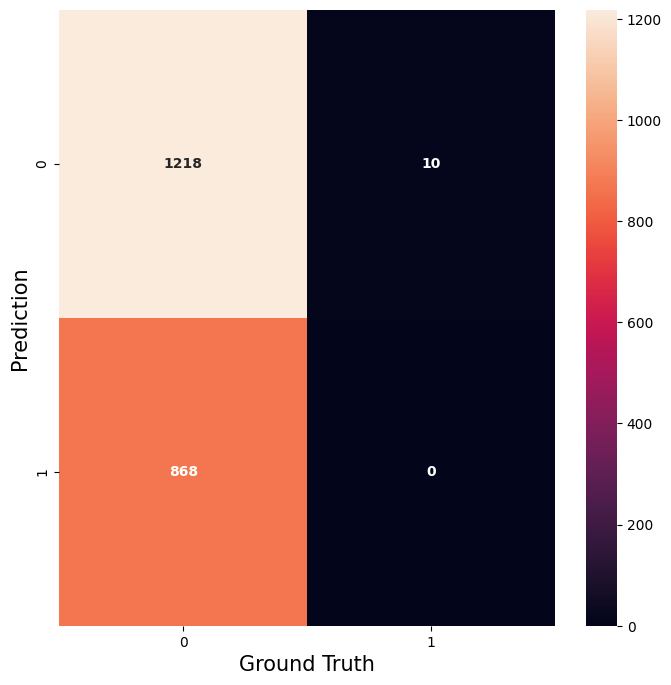

In [23]:
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)), annot=True, fmt='d', annot_kws={"size": 10, "weight": "bold"})
ax.set_ylabel('Prediction', fontsize=15);
ax.set_xlabel('Ground Truth', fontsize=15)

In [24]:

print("Testing metrics of CNN:")
print("==================")
tn,fp,fn,tp = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).ravel()
print('True Negative: ',tn)
print('False Positive: ',fp)
print('False Negative: ',fn)
print('True Positive: ',tp)
acc = (tp+tn)/(tp+tn+fp+fn)
PR = (tp)/(tp+fp)
FAR = (fp)/(tn+fp)
recall = (tp)/(tp+fn)
f1 = 2*((recall*PR)/(recall+PR))
print("Accuracy:", acc)
print("Precision:",PR)
print("False Alarm Rate:", FAR)
print("Recall:", recall)
print("f1:", f1)

Testing metrics of CNN:
True Negative:  1218
False Positive:  10
False Negative:  868
True Positive:  0
Accuracy: 0.5811068702290076
Precision: 0.0
False Alarm Rate: 0.008143322475570033
Recall: 0.0
f1: nan


<ipython-input-24-e9fcfb38466b>:12: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*((recall*PR)/(recall+PR))


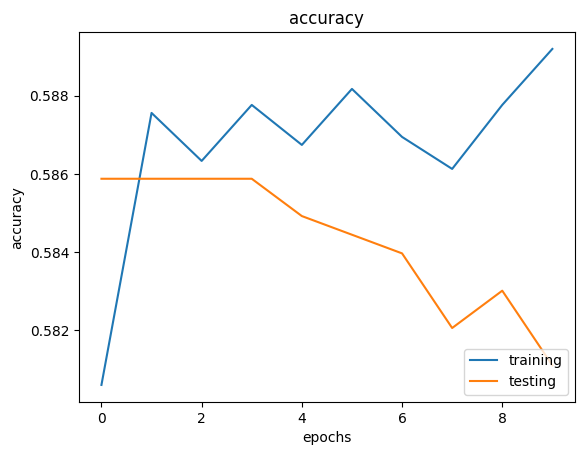

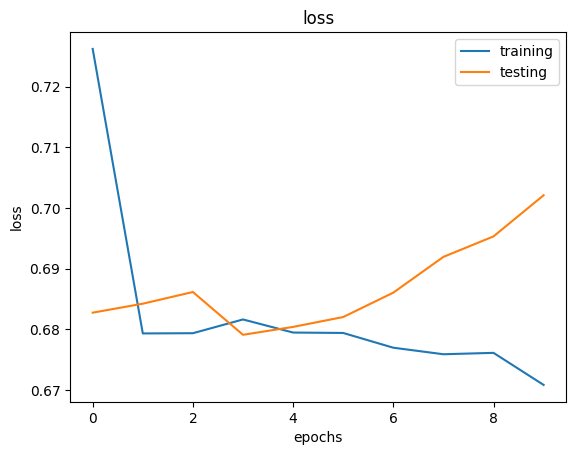

In [25]:
def visualize_training(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'testing'], loc='lower right')
    plt.show()

    # A chart showing our training vs validation loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'testing'], loc='upper right')
    plt.show()
visualize_training(history)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(image_array,label_array, test_size=0.3)
# X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.3)
print("train number",X_train.shape)
print("test number",X_test.shape)
print("training label",y_train.shape)
print("test label",y_test.shape)

train number (4888, 50, 50, 3)
test number (2096, 50, 50, 3)
training label (4888, 2)
test label (2096, 2)


Number of components explaining 90% variance: 426


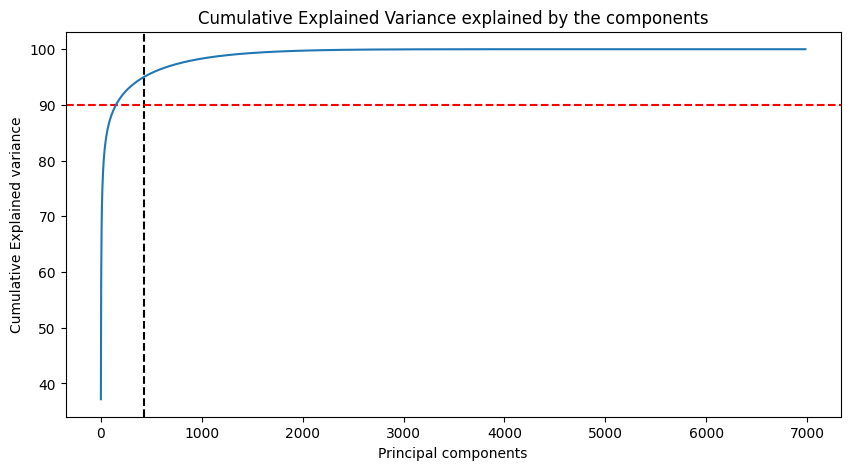

In [27]:
#Scale Data Images
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform([i.flatten() for i in image_array])

from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(X)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
# How many PCs explain 90% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 90% variance: "+ str(k))
#print("\n")
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [30]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,label_array, test_size=0.3)
# X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.3)
print("train number",X_train.shape)
print("test number",X_test.shape)
print("training label",y_train.shape)
print("test label",y_test.shape)

train number (3421, 426)
test number (2096, 426)
training label (3421,)
test label (2096,)
